Numpy, matplotlib.pyplot, pandas ve seaborn kütüphanelerini çekirdeğe dahil edelim.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import RFE
import missingno as missingno

Dizinde bulunan veri çerçevemizi startups değişkenine atayalım. startups değişkenini df değişkenine kopyalayarak kullanmaya başlayalım.

In [2]:
df=pd.read_csv("../input/tabletcsv/tablet.csv")

# Veri Çerçevesini Tanımak

İlk 5 gözlemini yazdıralım.

In [3]:
df.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,Yok,1.9,Yok,2.0,Yok,50,0.1,146,1,10,499,695,2328.0,2,Var,Yok,Yok,Normal,Beyaz
1,1046,Var,2.8,Var,0.0,Var,58,0.2,100,8,0,259,1040,3863.0,9,Var,Var,Var,Pahalı,Pembe
2,843,Yok,1.3,Var,1.0,Yok,16,0.9,119,7,4,593,732,1734.0,14,Yok,Yok,Var,Ucuz,Mor
3,894,Yok,0.5,Var,1.0,Var,50,0.5,199,3,14,1285,1462,3615.0,6,Var,Yok,Var,Pahalı,Turuncu
4,936,Yok,1.0,Yok,1.0,Yok,18,0.2,153,3,18,1330,1686,2391.0,3,Var,Var,Var,Normal,Beyaz


Son 5 gözlemi yazdıralım.

In [4]:
df.tail()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
1995,689,Yok,2.9,Var,3.0,Var,7,0.8,147,2,6,487,722,1241.0,16,Var,Yok,Yok,Çok Ucuz,Siyah
1996,1654,Yok,1.8,Yok,1.0,Yok,11,0.3,146,7,2,1184,1719,1070.0,14,Var,Var,Var,Ucuz,Sarı
1997,742,Yok,2.2,Var,4.0,Yok,56,0.2,190,7,14,577,1359,3557.0,12,Yok,Var,Var,Pahalı,Turuncu
1998,704,Yok,2.2,Var,4.0,Yok,53,0.2,186,6,6,251,1013,3653.0,15,Var,Var,Var,Normal,Turkuaz
1999,1872,Yok,0.5,Yok,5.0,Var,26,0.5,172,4,10,672,1088,2273.0,8,Var,Yok,Var,Normal,Siyah


Veri çerçevesinin bilgilerini görüntüleyelim.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BataryaGucu          2000 non-null   int64  
 1   Bluetooth            2000 non-null   object 
 2   MikroislemciHizi     2000 non-null   float64
 3   CiftHat              2000 non-null   object 
 4   OnKameraMP           1995 non-null   float64
 5   4G                   2000 non-null   object 
 6   DahiliBellek         2000 non-null   int64  
 7   Kalinlik             2000 non-null   float64
 8   Agirlik              2000 non-null   int64  
 9   CekirdekSayisi       2000 non-null   int64  
 10  ArkaKameraMP         2000 non-null   int64  
 11  CozunurlukYükseklik  2000 non-null   int64  
 12  CozunurlukGenislik   2000 non-null   int64  
 13  RAM                  1988 non-null   float64
 14  BataryaOmru          2000 non-null   int64  
 15  3G                   2000 non-null   o

Kaç gözlem ve öznitelikten oluştuğunu görüntüleyelim.

In [6]:
df.shape

(2000, 20)

Hedef değişkenimiz olan FiyatAraligi'na ait benzersiz değerleri görüntüleyelim.

In [7]:
df["FiyatAraligi"].unique()

array(['Normal', 'Pahalı', 'Ucuz', 'Çok Ucuz'], dtype=object)

Eksik verileri kontrol edelim.

In [8]:
df.isna().sum() #12 adet RAM değişkeninde, 5 adet OnKameraMP değişkenind eolmak üzere 17 adet eksik veri vardır.

BataryaGucu             0
Bluetooth               0
MikroislemciHizi        0
CiftHat                 0
OnKameraMP              5
4G                      0
DahiliBellek            0
Kalinlik                0
Agirlik                 0
CekirdekSayisi          0
ArkaKameraMP            0
CozunurlukYükseklik     0
CozunurlukGenislik      0
RAM                    12
BataryaOmru             0
3G                      0
Dokunmatik              0
WiFi                    0
FiyatAraligi            0
Renk                    0
dtype: int64

Veri çerçevesindeki eksik veri barındıran değişkenlerin birbirleriyle ilişkisi olduğunu kontrol etmek için missingno kütüphanesini kullanabiliriz.

<AxesSubplot:>

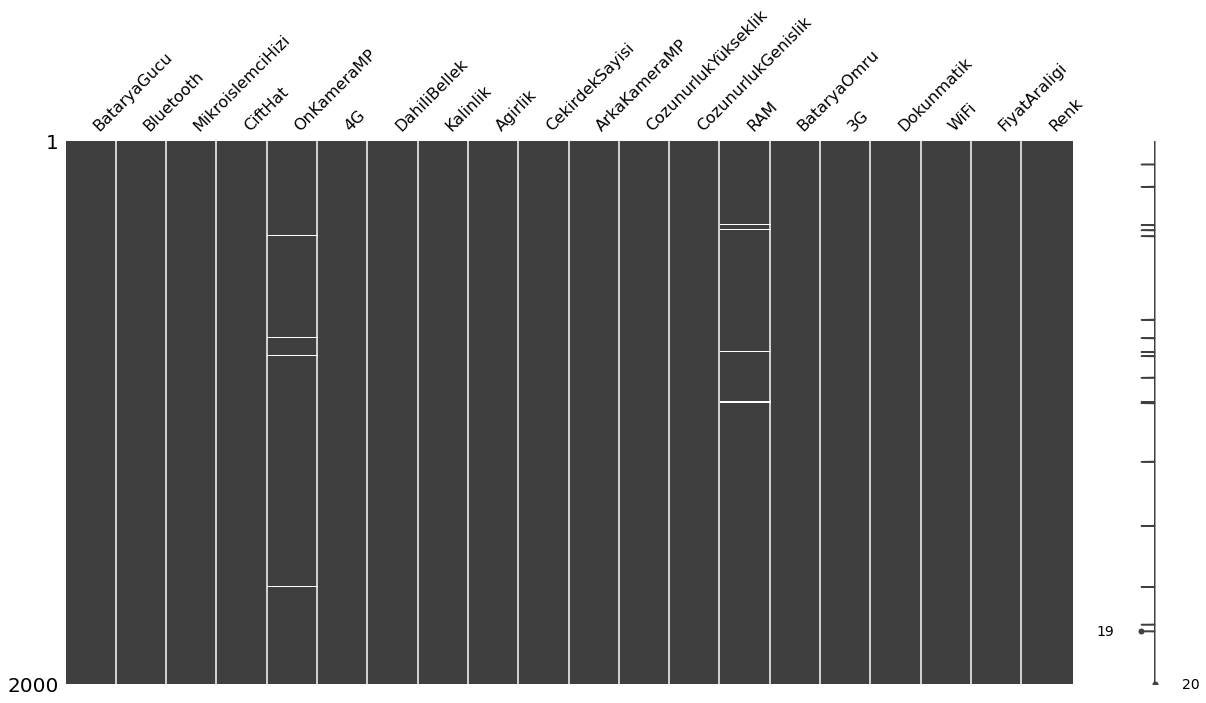

In [9]:
missingno.matrix(df,figsize=(20,10))

Veri çerçevesindeki sayısal değişkenler için temel istatistik değerlerini görüntüleyelim.

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BataryaGucu,2000.0,1238.518500,439.418206,501.0,851.75,1226.0,1615.25,1998.0
MikroislemciHizi,2000.0,1.522250,0.816004,0.5,0.70,1.5,2.20,3.0
OnKameraMP,1995.0,4.312281,4.342095,0.0,1.00,3.0,7.00,19.0
DahiliBellek,2000.0,32.046500,18.145715,2.0,16.00,32.0,48.00,64.0
Kalinlik,2000.0,0.501750,0.288416,0.1,0.20,0.5,0.80,1.0
Agirlik,2000.0,140.249000,35.399655,80.0,109.00,141.0,170.00,200.0
CekirdekSayisi,2000.0,4.520500,2.287837,1.0,3.00,4.0,7.00,8.0
ArkaKameraMP,2000.0,9.916500,6.064315,0.0,5.00,10.0,15.00,20.0
CozunurlukYükseklik,2000.0,645.108000,443.780811,0.0,282.75,564.0,947.25,1960.0
CozunurlukGenislik,2000.0,1251.515500,432.199447,500.0,874.75,1247.0,1633.00,1998.0


Hedef değişken olan FiyatAraligi değşkenine bağlı olarak tabletlerin özelliklerine göre ortalamalarını yazdıralım.

In [11]:
df.groupby(["FiyatAraligi"]).mean()

,BataryaGucu,MikroislemciHizi,OnKameraMP,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru
FiyatAraligi,,,,,,,,,,,,
Normal,1228.320,1.5298,4.498000,30.920,0.4908,143.614,4.682,10.018,632.284,1234.046,2582.81600,10.972
Pahalı,1379.984,1.5204,4.316000,33.976,0.5020,136.320,4.502,10.150,744.848,1369.838,3449.35041,11.098
Ucuz,1228.868,1.4886,4.340000,32.116,0.5240,140.510,4.298,9.924,666.892,1251.908,1679.49000,11.362
Çok Ucuz,1116.902,1.5502,4.092929,31.174,0.4902,140.552,4.600,9.574,536.408,1150.270,785.31400,10.612


value_counts() fonksiyonu ile veri çerçevemizin ve bazı değişkenlerimizin ne kadar dengeli dağıldığını sorgulayalım.

In [12]:
df.value_counts().T #veri çerçevemizin ne kadar dengeli dağıldığını sorguladık.

BataryaGucu  Bluetooth  MikroislemciHizi  CiftHat  OnKameraMP  4G   DahiliBellek  Kalinlik  Agirlik  CekirdekSayisi  ArkaKameraMP  CozunurlukYükseklik  CozunurlukGenislik  RAM     BataryaOmru  3G   Dokunmatik  WiFi  FiyatAraligi  Renk   
501          Var        0.5               Var      14.0        Yok  22            0.5       174      6               20            239                  1636                3077.0  17           Yok  Yok         Yok   Normal        Mor        1
1507         Var        0.9               Var      0.0         Var  42            0.4       123      5               0             682                  888                 1486.0  19           Var  Yok         Yok   Ucuz          Mor        1
1504         Yok        1.9               Var      7.0         Var  25            0.3       152      4               9             395                  1853                1788.0  13           Var  Yok         Var   Ucuz          Turkuaz    1
                        1.5      

In [13]:
df["FiyatAraligi"].value_counts() #Hedef değişkenimizin ne kadar dengeli dağıldığını sorguladık.

Çok Ucuz    500
Pahalı      500
Ucuz        500
Normal      500
Name: FiyatAraligi, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='FiyatAraligi', ylabel='count'>

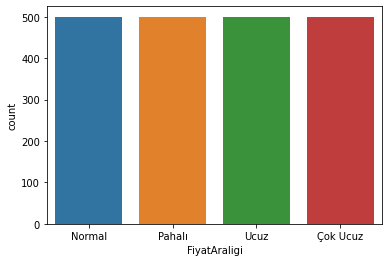

In [14]:
sns.countplot(df["FiyatAraligi"]) #Bu grafikten de dengeli olarak dağıldığını görebiliriz.

FiyatAraligi özniteliğine göre bir gruplama işlemi yapalım ve görselleştirelim.

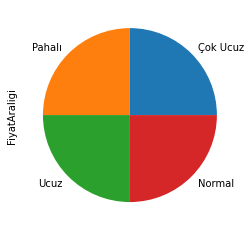

In [15]:
df["FiyatAraligi"].value_counts().plot(kind="pie");

In [16]:
df["Renk"].value_counts() #Renk değişkeni için 

Beyaz         194
Siyah         183
Mor           175
Turuncu       175
Kırmızı       168
Pembe         168
Turkuaz       167
Kahverengi    157
Sarı          156
Yeşil         154
Gri           153
Mavi          150
Name: Renk, dtype: int64

Renk özniteliğine göre bir gruplama işlemi yapalım ve görselleştirelim.

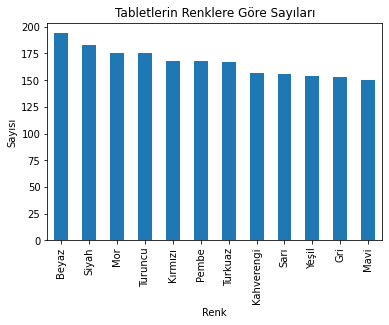

In [17]:
df["Renk"].value_counts().plot(kind="bar");
plt.title("Tabletlerin Renklere Göre Sayıları");
plt.xlabel("Renk");
plt.ylabel("Sayısı");

In [18]:
df["Bluetooth"].value_counts()

Yok    1010
Var     990
Name: Bluetooth, dtype: int64

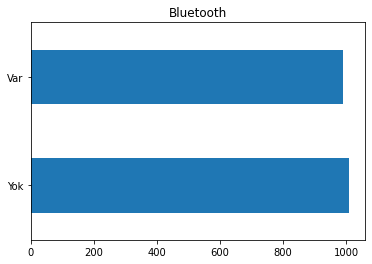

In [19]:
df["Bluetooth"].value_counts().plot.barh().set_title("Bluetooth");

Korelasyon matrisi çizdirelim.

In [20]:
df.corr() #Pozitif yönlü en güçlü ilişki ArkaKameraMp ve OnKameraMp değişkenleri arasındadır.

,BataryaGucu,MikroislemciHizi,OnKameraMP,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru
BataryaGucu,1.000000,0.011482,0.032167,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000883,0.052510
MikroislemciHizi,0.011482,1.000000,-0.000172,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003969,-0.011432
OnKameraMP,0.032167,-0.000172,1.000000,-0.028642,-0.001723,0.024585,-0.013721,0.645697,-0.010662,-0.005646,0.012528,-0.007121
DahiliBellek,-0.004004,0.006545,-0.028642,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032883,-0.002790
Kalinlik,0.034085,-0.014364,-0.001723,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.007293,0.017003
Agirlik,0.001844,0.012350,0.024585,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002536,0.006209
CekirdekSayisi,-0.029727,-0.005724,-0.013721,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.005576,0.013148
ArkaKameraMP,0.031441,-0.005245,0.645697,-0.033273,0.026282,0.018844,-0.001193,1.000000,-0.018465,0.004196,0.029540,0.014657
CozunurlukYükseklik,0.014901,-0.014523,-0.010662,0.010441,0.025263,0.000939,-0.006872,-0.018465,1.000000,0.510664,-0.023421,-0.010645
CozunurlukGenislik,-0.008402,-0.009476,-0.005646,-0.008335,0.023566,0.000090,0.024480,0.004196,0.510664,1.000000,0.002101,0.006720


Seaborn ile korelasyon matrisinin ısı haritasını çizdirelim.

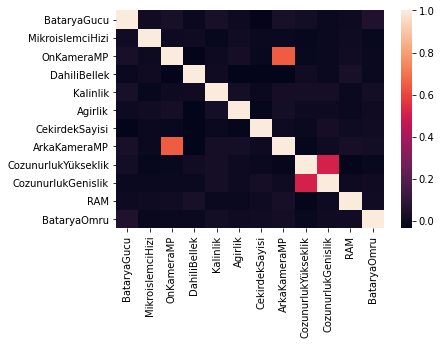

In [21]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);

ArkaKameraMp ve OnKameraMp arasındaki korelasyonu daha iyi görebilmek için scatterplot çizdirelim.

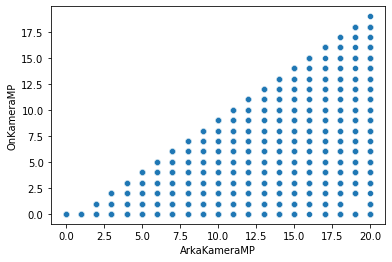

In [22]:
sns.scatterplot(x = "ArkaKameraMP", y = "OnKameraMP",  data = df);

CozunurlukYükseklik ve CozunurlukGenislik arasındaki korelasyonu daha iyi görebilmek için scatterplot çizdirelim.

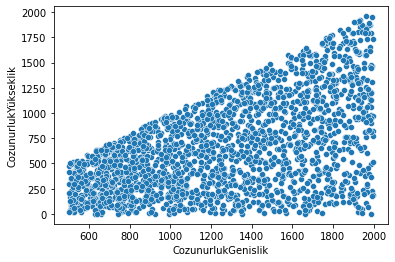

In [23]:
sns.scatterplot(x = "CozunurlukGenislik", y = "CozunurlukYükseklik",  data = df);

ArkaKameraMp ve OnKameraMp için jointplot çizdirelim.

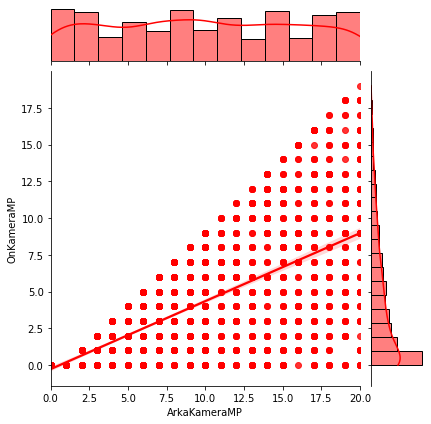

In [24]:
sns.jointplot(data=df, x="ArkaKameraMP", y="OnKameraMP", kind="reg",color="red")

CozunurlukYükseklik ve CozunurlukGenislik için jointplot çizdirelim.

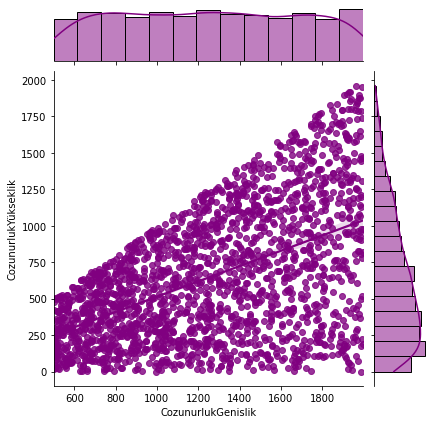

In [25]:
sns.jointplot(data=df, x="CozunurlukGenislik", y="CozunurlukYükseklik", kind="reg",color="purple")

BataryaGucu ve FiyatAraligi değişkenleri için barplot çizdirelim.

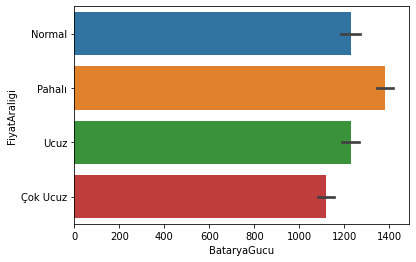

In [26]:
sns.barplot(x = "BataryaGucu", y = "FiyatAraligi", data = df);

CozunurlukGenislik ve FiyatAraligi değişkenleri için barplot çizdirelim.

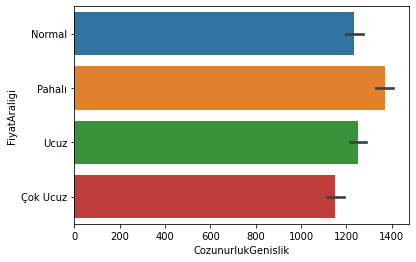

In [27]:
sns.barplot(x = "CozunurlukGenislik", y = "FiyatAraligi", data = df);

RAM ve FiyatAraligi değişkenleri için barplot çizdirelim.

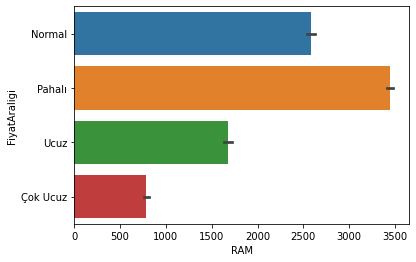

In [28]:
sns.barplot(x = "RAM", y = "FiyatAraligi", data = df);

BataryaGucu ve RAM değişkenlerini FiyatAraligina göre görselleştirmek için bir scatterplot çizdirelim.

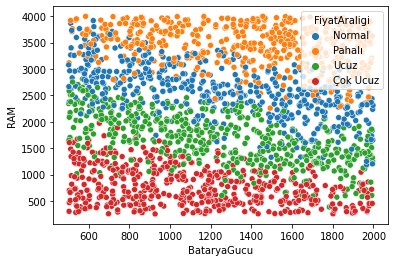

In [29]:
sns.scatterplot(x = "BataryaGucu", y = "RAM", hue = "FiyatAraligi",  data = df);

Keman grafiği çizdirerek BataryaGucu değişkeninin dağılımını inceleyelim.

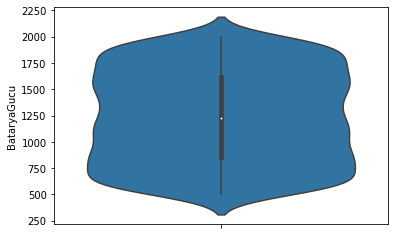

In [30]:
sns.violinplot(y = "BataryaGucu", data = df);

BataryaGucu değişkeninin FiyatAraligi değişkeni üzerindeki dağılımını Renk değişkenine göre görselleştirmek için barplot çizdirelim.

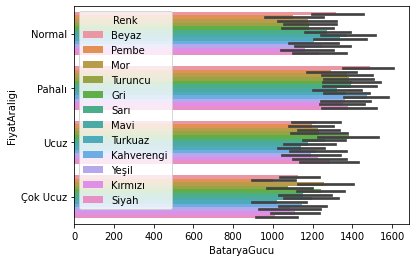

In [31]:
sns.barplot(x="BataryaGucu",y="FiyatAraligi",hue = "Renk",data=df); #hue parametresi ile grafiğe bir boyut daha ekledik

Grafikte RAM değişkeninin FiyatAraligi değişkeni üzerinde Bluetooth'a sahip olup olmama durumuna göre olan dağılımı verilmiştir. 

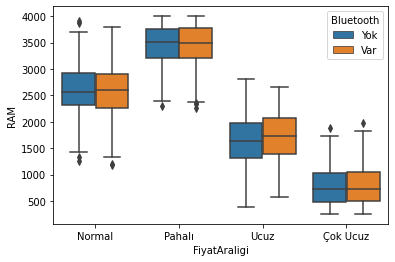

In [32]:
sns.boxplot(x="FiyatAraligi",y="RAM",hue="Bluetooth",data=df);

<AxesSubplot:xlabel='FiyatAraligi', ylabel='RAM'>

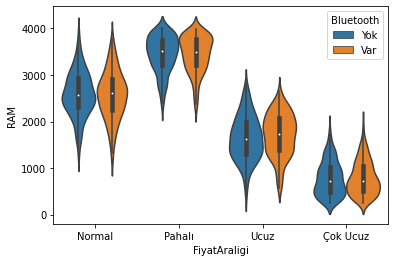

In [33]:
sns.violinplot(x = "FiyatAraligi", y = "RAM", hue = "Bluetooth", data = df) # dağılımı yorumlayabilmek için violinplot çizdirdik

Sayısal değişkenlerin dağılımını görmek için df üzerinden histogram çizdirelim.

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


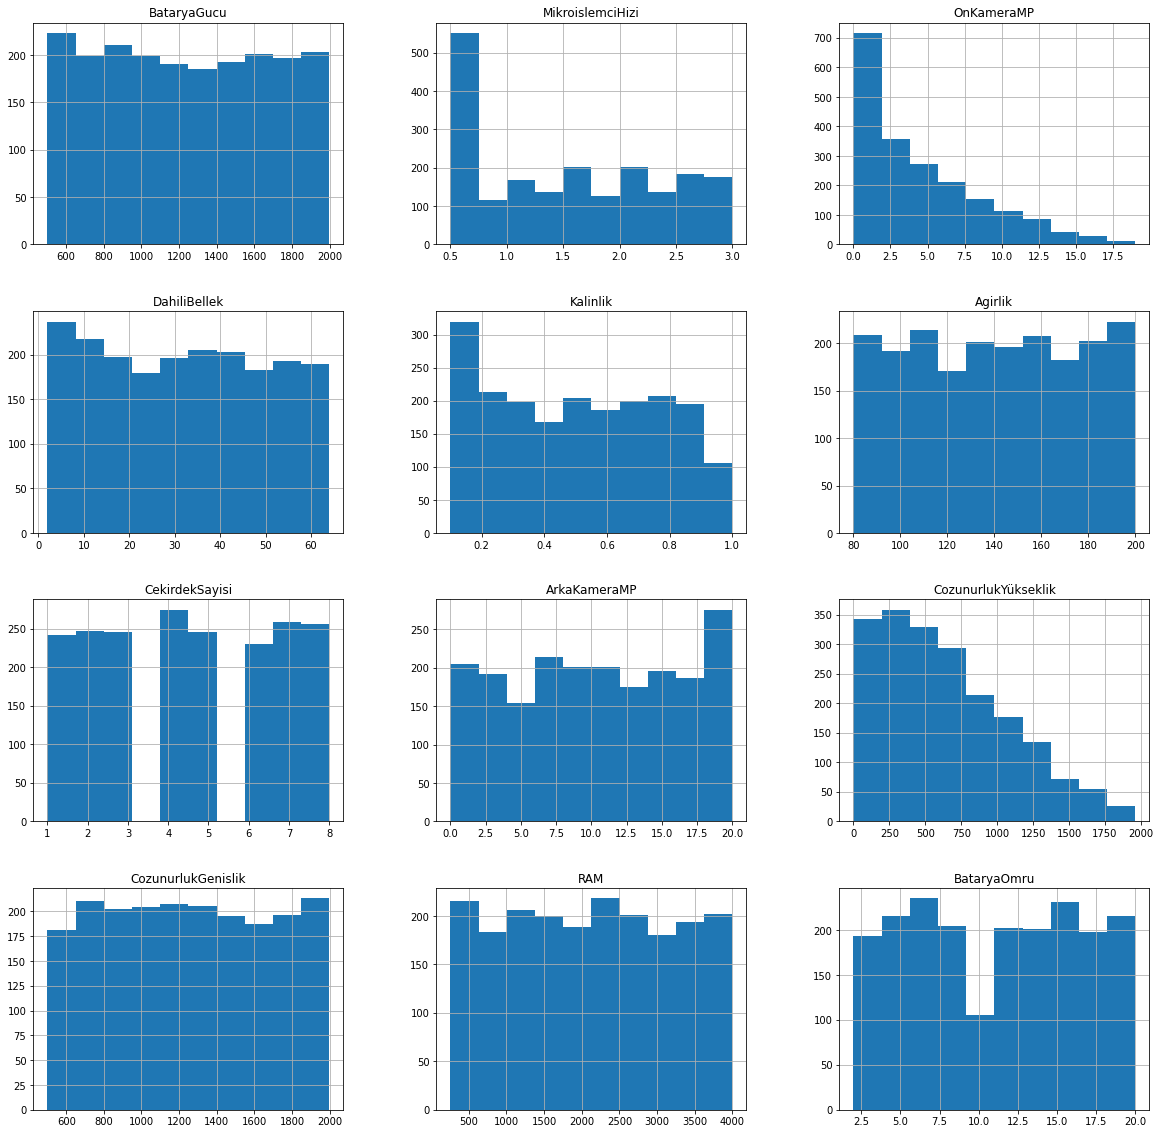

In [34]:
df.hist(figsize=(20,20)) 
plt.show()

Eksik verilerimiz olduğunu görmüştük.Eksik değerler olan değişkenlerdeki eksik değerler yerine değişkenlerin ortalamalarını yazdıralım.

In [35]:
df["RAM"].fillna(df["RAM"].mean(),inplace=True) #RAM değişkenindeki eksik verileri RAM değişkeninin ortalama değeriyle doldurduk.

In [36]:
df["OnKameraMP"].fillna(df["OnKameraMP"].mean(),inplace=True)

Eksik değer kalmış mı kontrol edelim.

In [37]:
df.isna().sum() 

BataryaGucu            0
Bluetooth              0
MikroislemciHizi       0
CiftHat                0
OnKameraMP             0
4G                     0
DahiliBellek           0
Kalinlik               0
Agirlik                0
CekirdekSayisi         0
ArkaKameraMP           0
CozunurlukYükseklik    0
CozunurlukGenislik     0
RAM                    0
BataryaOmru            0
3G                     0
Dokunmatik             0
WiFi                   0
FiyatAraligi           0
Renk                   0
dtype: int64

<AxesSubplot:>

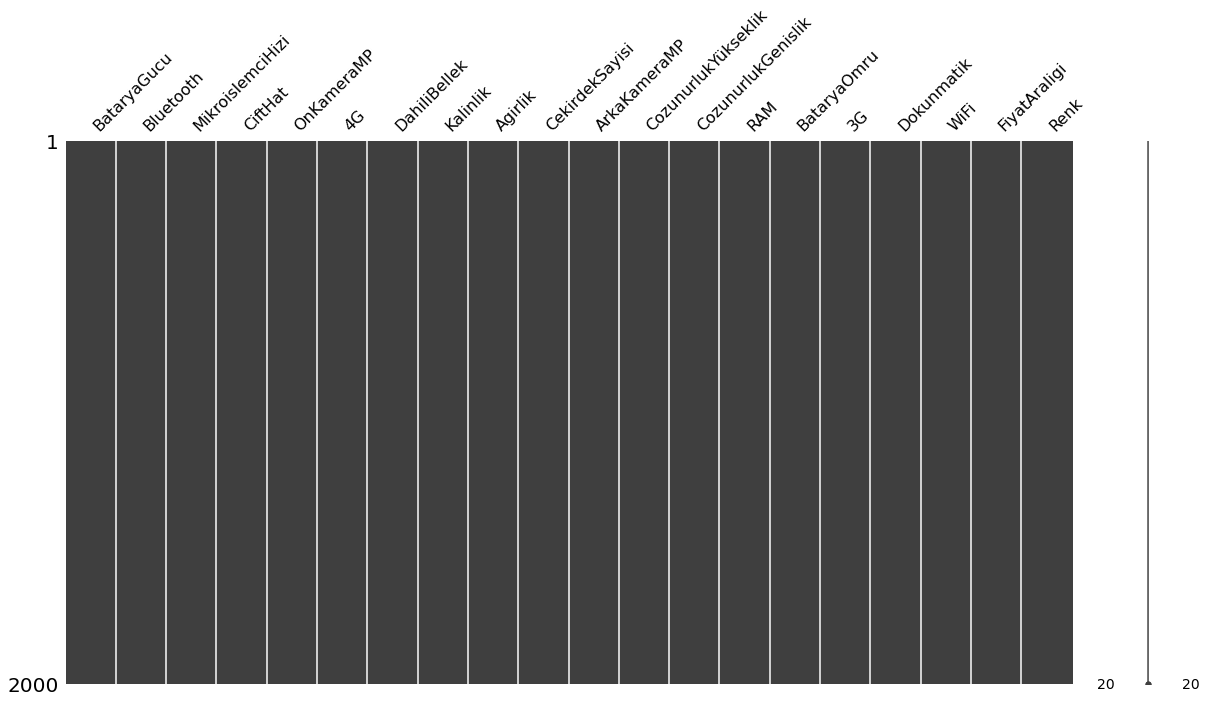

In [38]:
missingno.matrix(df,figsize=(20,10))

Kategorik değişkenlerin sıralanabilir(ordered) veya sıralanamaz(nominal) olma durumlarına göre uygun sayısallaştırma işlemlerini getdummies yardımıyla yapalım.

In [39]:
df['Bluetooth'] = pd.Categorical(df['Bluetooth'])
df_Bluetooth = pd.get_dummies(df['Bluetooth'], prefix = 'Bluetooth')
df_Bluetooth.head()

,Bluetooth_Var,Bluetooth_Yok
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1


In [40]:
df['CiftHat'] = pd.Categorical(df['CiftHat'])
df_CiftHat = pd.get_dummies(df['CiftHat'], prefix = 'CiftHat')
df_CiftHat.head()

,CiftHat_Var,CiftHat_Yok
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [41]:
df['4G'] = pd.Categorical(df['4G'])
df_4G = pd.get_dummies(df['4G'], prefix = '4G')
df_4G.head()

,4G_Var,4G_Yok
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1


In [42]:
df['3G'] = pd.Categorical(df['3G'])
df_3G= pd.get_dummies(df['3G'], prefix = '3G')
df_3G.head()

,3G_Var,3G_Yok
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [43]:
df['Dokunmatik'] = pd.Categorical(df['Dokunmatik'])
df_Dokunmatik = pd.get_dummies(df['Dokunmatik'], prefix = 'Dokunmatik')
df_Dokunmatik.head()

,Dokunmatik_Var,Dokunmatik_Yok
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


In [44]:
df['WiFi'] = pd.Categorical(df['WiFi'])
df_WiFi= pd.get_dummies(df['WiFi'], prefix = 'WiFi')
df_WiFi.head()

,WiFi_Var,WiFi_Yok
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [45]:
df['Renk'] = pd.Categorical(df['Renk'])
df_Renk= pd.get_dummies(df['Renk'], prefix = 'Renk')
df_Renk.head()

,Renk_Beyaz,Renk_Gri,Renk_Kahverengi,Renk_Kırmızı,Renk_Mavi,Renk_Mor,Renk_Pembe,Renk_Sarı,Renk_Siyah,Renk_Turkuaz,Renk_Turuncu,Renk_Yeşil
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,0,0


Sütunları silip yeni veri çerçevesine atalım.

In [46]:
df_drop1=df.drop(["Bluetooth"],axis=1)
df_drop2=df_drop1.drop(["CiftHat"],axis=1)
df_drop3=df_drop2.drop(["4G"],axis=1)
df_drop4=df_drop3.drop(["3G"],axis=1)
df_drop5=df_drop4.drop(["Dokunmatik"],axis=1)
df_drop6=df_drop5.drop(["WiFi"],axis=1)
df_drop7=df_drop6.drop(["Renk"],axis=1)
df_drop7.head()


,BataryaGucu,MikroislemciHizi,OnKameraMP,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,FiyatAraligi
0,1325,1.9,2.0,50,0.1,146,1,10,499,695,2328.0,2,Normal
1,1046,2.8,0.0,58,0.2,100,8,0,259,1040,3863.0,9,Pahalı
2,843,1.3,1.0,16,0.9,119,7,4,593,732,1734.0,14,Ucuz
3,894,0.5,1.0,50,0.5,199,3,14,1285,1462,3615.0,6,Pahalı
4,936,1.0,1.0,18,0.2,153,3,18,1330,1686,2391.0,3,Normal


Dataframe'leri birleştirelim.

In [47]:
df_new = pd.concat([df_drop7,df_Bluetooth, df_CiftHat,df_4G,df_3G,df_Dokunmatik,df_WiFi,df_Renk], axis = 1)
df_new.head()

,BataryaGucu,MikroislemciHizi,OnKameraMP,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,...,Renk_Kahverengi,Renk_Kırmızı,Renk_Mavi,Renk_Mor,Renk_Pembe,Renk_Sarı,Renk_Siyah,Renk_Turkuaz,Renk_Turuncu,Renk_Yeşil
0,1325,1.9,2.0,50,0.1,146,1,10,499,695,...,0,0,0,0,0,0,0,0,0,0
1,1046,2.8,0.0,58,0.2,100,8,0,259,1040,...,0,0,0,0,1,0,0,0,0,0
2,843,1.3,1.0,16,0.9,119,7,4,593,732,...,0,0,0,1,0,0,0,0,0,0
3,894,0.5,1.0,50,0.5,199,3,14,1285,1462,...,0,0,0,0,0,0,0,0,1,0
4,936,1.0,1.0,18,0.2,153,3,18,1330,1686,...,0,0,0,0,0,0,0,0,0,0


Veri çerçevemizi bağımlı ve bağımsız değişkenler olmak üzere bölütleyelim.

In [48]:
X = df_new.drop("FiyatAraligi", axis = 1)
y = df_new["FiyatAraligi"] #bağımlı değişkenimiz

Bağımlı ve bağımsız değişkenleri kontrol edelim.

In [49]:
X

,BataryaGucu,MikroislemciHizi,OnKameraMP,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,...,Renk_Kahverengi,Renk_Kırmızı,Renk_Mavi,Renk_Mor,Renk_Pembe,Renk_Sarı,Renk_Siyah,Renk_Turkuaz,Renk_Turuncu,Renk_Yeşil
0,1325,1.9,2.0,50,0.1,146,1,10,499,695,...,0,0,0,0,0,0,0,0,0,0
1,1046,2.8,0.0,58,0.2,100,8,0,259,1040,...,0,0,0,0,1,0,0,0,0,0
2,843,1.3,1.0,16,0.9,119,7,4,593,732,...,0,0,0,1,0,0,0,0,0,0
3,894,0.5,1.0,50,0.5,199,3,14,1285,1462,...,0,0,0,0,0,0,0,0,1,0
4,936,1.0,1.0,18,0.2,153,3,18,1330,1686,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,689,2.9,3.0,7,0.8,147,2,6,487,722,...,0,0,0,0,0,0,1,0,0,0
1996,1654,1.8,1.0,11,0.3,146,7,2,1184,1719,...,0,0,0,0,0,1,0,0,0,0
1997,742,2.2,4.0,56,0.2,190,7,14,577,1359,...,0,0,0,0,0,0,0,0,1,0
1998,704,2.2,4.0,53,0.2,186,6,6,251,1013,...,0,0,0,0,0,0,0,1,0,0


In [50]:
y

0         Normal
1         Pahalı
2           Ucuz
3         Pahalı
4         Normal
          ...   
1995    Çok Ucuz
1996        Ucuz
1997      Pahalı
1998      Normal
1999      Normal
Name: FiyatAraligi, Length: 2000, dtype: object

Bu bağımlı ve bağımsız değişkenlerden train ve test olmak üzere 4 parça oluşturalım. Bunu yapmak için train_test_split kullanalım.

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42) 
#değişkenler %85 oranında eğitim ve %15 oranında test olmak üzere bölündü.
#random_state=42 her eğitimde aynı sonuçların çıkması için kullanırız.

4 parça değişkeni kontrol edelim.

In [53]:
X_train

,BataryaGucu,MikroislemciHizi,OnKameraMP,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,...,Renk_Kahverengi,Renk_Kırmızı,Renk_Mavi,Renk_Mor,Renk_Pembe,Renk_Sarı,Renk_Siyah,Renk_Turkuaz,Renk_Turuncu,Renk_Yeşil
581,1454,1.6,6.0,21,0.2,160,4,10,186,1100,...,0,0,0,0,1,0,0,0,0,0
76,1254,1.2,2.0,50,0.7,108,5,6,462,1013,...,0,0,0,0,0,0,0,1,0,0
1916,1762,0.6,3.0,26,0.1,83,6,14,525,704,...,0,0,0,1,0,0,0,0,0,0
1414,1876,1.3,9.0,64,1.0,98,3,19,600,1211,...,0,0,0,0,0,0,0,0,0,1
780,1426,1.6,4.0,12,0.7,174,5,16,1573,1694,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,605,1.0,8.0,9,0.1,142,3,16,160,1026,...,0,1,0,0,0,0,0,0,0,0
1294,1149,2.2,4.0,30,0.2,106,6,5,1617,1675,...,1,0,0,0,0,0,0,0,0,0
860,534,0.5,4.0,2,0.2,85,5,16,911,1220,...,0,0,0,0,0,0,0,0,0,0
1459,1720,1.6,18.0,2,0.8,188,5,20,334,896,...,0,0,0,0,0,0,0,1,0,0


In [54]:
X_test

,BataryaGucu,MikroislemciHizi,OnKameraMP,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,...,Renk_Kahverengi,Renk_Kırmızı,Renk_Mavi,Renk_Mor,Renk_Pembe,Renk_Sarı,Renk_Siyah,Renk_Turkuaz,Renk_Turuncu,Renk_Yeşil
1860,1433,2.3,2.0,5,0.1,129,5,11,420,784,...,0,0,0,0,0,0,0,0,0,0
353,1174,0.9,7.0,30,1.0,147,4,20,744,1244,...,0,0,0,0,0,0,1,0,0,0
1333,999,2.6,11.0,56,1.0,165,4,13,342,1641,...,0,0,0,0,1,0,0,0,0,0
905,972,0.5,5.0,13,0.4,193,5,8,1392,1795,...,0,0,0,0,0,0,0,1,0,0
1289,1811,2.5,4.0,5,0.6,98,4,16,447,568,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,768,0.9,16.0,56,0.1,113,1,20,418,515,...,0,0,0,0,0,0,0,0,0,0
45,1067,2.4,3.0,40,0.6,122,8,15,494,1989,...,0,0,0,0,0,0,1,0,0,0
1719,1062,0.5,3.0,39,0.9,124,4,4,571,817,...,0,0,0,1,0,0,0,0,0,0
1831,1187,2.2,0.0,46,0.4,145,2,9,1173,1814,...,0,0,0,0,0,0,1,0,0,0


In [55]:
y_train

581     Çok Ucuz
76        Pahalı
1916      Normal
1414      Pahalı
780         Ucuz
          ...   
1130    Çok Ucuz
1294      Pahalı
860       Normal
1459      Normal
1126        Ucuz
Name: FiyatAraligi, Length: 1700, dtype: object

In [56]:
y_test

1860        Ucuz
353     Çok Ucuz
1333      Normal
905         Ucuz
1289      Normal
          ...   
316     Çok Ucuz
45      Çok Ucuz
1719    Çok Ucuz
1831      Pahalı
427         Ucuz
Name: FiyatAraligi, Length: 300, dtype: object

# GaussianNB modeli yaratalım ve eğitimi gerçekleştirelim.

In [57]:
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, recall_score, f1_score, precision_score
from sklearn.naive_bayes import GaussianNB

In [58]:
nb =GaussianNB() # modeli inşa ediyoruz.
nb_model = nb.fit(X, y) # modelin eğitimini sadece eğitim değil,  [eğitim + test] tüm gözlemler üzerinde yapıyoruz.
nb_model

GaussianNB()

Model üzerinde yazılabilecek tüm komutları görüntüleyelim.

In [59]:
dir(nb_model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_X',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_joint_log_likelihood',
 '_more_tags',
 '_partial_fit',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_update_mean_variance',
 '_validate_data',
 'class_count_',
 'class_prior_',
 'classes_',
 'epsilon_',
 'fit',
 'get_params',
 'n_features_in_',
 'partial_fit',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'priors',
 'score',
 'set_params',
 'sigma_',
 'theta_',
 'var_smoothing']

Modelin rastgele 10 gözleminin ait olduğu türü tahmin ettirmeye çalışalım.

In [60]:
nb_model.predict(X.sample(10)) #rastgele 10 X için

array(['Çok Ucuz', 'Normal', 'Pahalı', 'Çok Ucuz', 'Pahalı', 'Ucuz',
       'Çok Ucuz', 'Çok Ucuz', 'Ucuz', 'Ucuz'], dtype='<U8')

Veri çerçevesindeki tüm gözlemleri tahmin edip y_pred değişkenine atayalım.

In [61]:
y_pred = nb_model.predict(X) #tüm X'ler için 

Confusion Matrix skoru olan accuracy değerine bakalım.

In [62]:
accuracy_score(y, y_pred)
#Bütün tahminler içerisinden doğru tahminlerin oranıdır. Dengesiz veri kümelerinde kullanamayız.

0.7645

Karmaşıklık matrisini çizdirelim.

In [63]:
karmasiklik_matrisi = confusion_matrix(y, y_pred)
print(karmasiklik_matrisi)
#Karmaşıklık matrisi iki veya çok sınıflı sınıflandırma probleminde, modelin doğruluğunu ölçmek için kullanılır.

[[329  79  92   0]
 [ 83 411   6   0]
 [ 95   0 350  55]
 [  2   0  59 439]]


Karmaşıklık matris skorunu kodlayarak doğruluk skorunu hesaplamayı deneyelim.

In [64]:
(karmasiklik_matrisi[0][0] + karmasiklik_matrisi[1][1] + karmasiklik_matrisi[2][2]) / (karmasiklik_matrisi[0][0] + karmasiklik_matrisi[0][1] +   karmasiklik_matrisi[1][0] + karmasiklik_matrisi[1][1] + karmasiklik_matrisi[2][0]  + karmasiklik_matrisi[0][2] + karmasiklik_matrisi[2][2] + karmasiklik_matrisi[1][2]+ karmasiklik_matrisi[2][1])

0.754325259515571

Modeli farklı gözlemlerle kombinleyerek tekrardan skorunu hesaplayalım. Yani 10 kez katlamalı çapraz doğrulama yapalım.

In [65]:
cross_val_score(nb_model, X, y, cv = 10) #Test için küçük parçalara bölüyoruz. Burada 10 parçaya böldük.

array([0.735, 0.715, 0.79 , 0.72 , 0.695, 0.7  , 0.76 , 0.72 , 0.725,
       0.755])

Ortalamalarını alalım.

In [66]:
cross_val_score(nb_model, X, y, cv = 10).mean()

0.7314999999999999

Sınıflandırma raporu çizdirelim.

In [67]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

      Normal       0.65      0.66      0.65       500
      Pahalı       0.84      0.82      0.83       500
        Ucuz       0.69      0.70      0.70       500
    Çok Ucuz       0.89      0.88      0.88       500

    accuracy                           0.76      2000
   macro avg       0.77      0.76      0.77      2000
weighted avg       0.77      0.76      0.77      2000



Kesinlik skorunu görüntüleyelim.

In [68]:
PrecisionScore = precision_score(y, y_pred, average='weighted')
PrecisionScore
#Kesinlik (Precision) ölçütü pozitif tahminde bulunduğumuz verilerin gerçekte hangi oranda pozitif olduğunu ölçer.

0.7660350514830487

Yakalama (Recall) skorunu görüntüleyelim.

In [69]:
RecallScore = recall_score(y, y_pred, average='weighted')
RecallScore
# Recall(Yakalama) ölçütü gerçekte pozitif olanların ne kadarının doğru tahmin edildiğini ölçer.

0.7645

F1 skorunu görüntüleyelim.

In [70]:
F1Score = f1_score(y, y_pred, average = 'weighted')  
F1Score
#Kesinlik ve yakalama ölçütlerinin ağırlıklı ortalamalarının hesaplanması ile F1 Score elde edilir.
#F1 Score ve Accuracy Score arasında çok fark görmeye başlarsak dengesiz bir veri kümesine sahibiz demektir.

0.7652169283153585

Modelin daha iyi doğruluk skoru vermesi için ne yapabiliriz?

In [71]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

Kaç adet özniteliğimiz var ?

In [72]:
len(X.columns)

36

Feature Selection yöntemi için Scikit-learn kütüphanesinde bulunan, her bir bağımsız değişken için istatistik hesaplandıktan sonra filtreleme yapmamızı sağlayan KBest tekniğini kullanacağız.

k parametresi olarak 36 değişkenimiz olduğu için ve 36 tanesinin de skorlarını görüntülemek için 36 giriyoruz.

In [73]:
test = SelectKBest(k = 36)
test

SelectKBest(k=36)

Bağımlı ve bağımsız değişkenleri oluşturduğumuz test nesnesine parametre olarak girelim ve eğitelim.

In [74]:
fit = test.fit(X, y)
fit

SelectKBest(k=36)

Tüm özniteliklerin skorlarını görüntüleyelim.

In [75]:
set_printoptions(precision = 3)  # precision, ondalıklı sayının virgülden sonra gelecek karakter adedini verir.
print(fit.scores_)

[3.160e+01 4.937e-01 7.302e-01 2.923e+00 1.501e+00 3.594e+00 2.625e+00
 8.254e-01 1.948e+01 2.262e+01 3.286e+03 1.629e+00 4.768e-01 4.768e-01
 4.282e-01 4.282e-01 1.060e+00 1.060e+00 4.573e-01 4.573e-01 1.293e+00
 1.293e+00 2.849e-01 2.849e-01 7.985e-01 7.425e-01 1.852e+00 3.287e-01
 8.546e-01 5.901e-01 4.846e-01 2.221e-01 1.305e+00 2.380e+00 5.734e-01
 2.452e+00]


Daha iyi görüntülemek için bir döngü yazalım ve karşılıklarına öznitelik isimlerini de yazdıralım.

In [76]:
for indis, skor in enumerate(fit.scores_):
    print(skor, " -> ", X.columns[indis])

31.59815753989697  ->  BataryaGucu
0.49370780102890643  ->  MikroislemciHizi
0.7302215314309588  ->  OnKameraMP
2.9229960794178416  ->  DahiliBellek
1.5006824396689178  ->  Kalinlik
3.5943181851549952  ->  Agirlik
2.6254151540861677  ->  CekirdekSayisi
0.8254463576889531  ->  ArkaKameraMP
19.484841776704883  ->  CozunurlukYükseklik
22.620882490611052  ->  CozunurlukGenislik
3285.8633430873674  ->  RAM
1.6288113087357383  ->  BataryaOmru
0.4767677091173118  ->  Bluetooth_Var
0.47676770911738764  ->  Bluetooth_Yok
0.42823928557591956  ->  CiftHat_Var
0.4282392855760711  ->  CiftHat_Yok
1.0595245262724162  ->  4G_Var
1.0595245262721884  ->  4G_Yok
0.4573197497059122  ->  3G_Var
0.45731974970570366  ->  3G_Yok
1.2933022318768916  ->  Dokunmatik_Var
1.2933022318768916  ->  Dokunmatik_Yok
0.2849404695197208  ->  WiFi_Var
0.2849404695195694  ->  WiFi_Yok
0.7985277644423141  ->  Renk_Beyaz
0.7424648216639064  ->  Renk_Gri
1.8515556048444797  ->  Renk_Kahverengi
0.32874764864466033  ->  Renk_Kı

Doğruluk skorunu yükseltmek istiyoruz, bu yüzden sadece en anlamlı olan öznitelikleri seçelim ve tekrardan model kurup eğitelim.

In [77]:
y = df['FiyatAraligi']
X = df[["BataryaGucu", "CozunurlukYükseklik", "CozunurlukGenislik", "RAM"]]
#BataryaGucu,CozunurlukYükseklik,CozunurlukGenislik,RAM özniteliklerini seçtik

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [79]:
nb = GaussianNB()
nb_model = nb.fit(X,y)
nb_model

GaussianNB()

In [80]:
y_pred = nb_model.predict(X)

In [81]:
accuracy_score(y, y_pred)

0.801

Bu doğruluk skoru tesadüfi olarak mı arttı? Çapraz doğrulama ile teyit edelim.

In [82]:
cross_val_score(nb_model, X, y, cv = 10)

array([0.845, 0.8  , 0.78 , 0.74 , 0.795, 0.82 , 0.805, 0.77 , 0.795,
       0.83 ])

In [83]:
cross_val_score(nb_model, X, y, cv = 10).mean()

0.798

Karmaşıklık matrisi çizdirelim.

In [84]:
karmasiklik_matrisi = confusion_matrix(y, y_pred)
print(karmasiklik_matrisi)

[[354  58  88   0]
 [ 49 442   9   0]
 [ 96   0 357  47]
 [  0   0  51 449]]


Sınıflandırma raporuna bakalım.

In [85]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

      Normal       0.71      0.71      0.71       500
      Pahalı       0.88      0.88      0.88       500
        Ucuz       0.71      0.71      0.71       500
    Çok Ucuz       0.91      0.90      0.90       500

    accuracy                           0.80      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.80      0.80      0.80      2000



# DecisionTree ve KNN Modeli

Kütüphaneleri import edelim.

In [86]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, auc, roc_curve, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import recall_score, f1_score, precision_score
from sklearn.tree import DecisionTreeClassifier
from warnings import filterwarnings
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.metrics import confusion_matrix as cm
from matplotlib.legend_handler import HandlerLine2D
from sklearn.tree import export_graphviz
from sklearn.tree import export_text

In [87]:
#!pip3 install pydotplus
#!pip3 install graphviz
#!pip3 install skompiler
#!pip3 install sklearn
#!pip3 install astor

Modelimizi inşa edelim ve eğitelim.

In [88]:
X = df_new.drop("FiyatAraligi", axis = 1)
y = df_new["FiyatAraligi"]

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [90]:
cart = DecisionTreeClassifier(random_state = 42, criterion="entropy") 
cart_model = cart.fit(X_train, y_train)

Şimdilik parametre optimizasyonu yapmadan modeli eğitmiş olalım ve modelin karar ağacını görüntüleyelim.

In [91]:
from skompiler import skompile
print(skompile(cart_model.predict).to("python/code"))

ModuleNotFoundError: No module named 'skompiler'

Parametreleri optimize etmeden kurduğumuz bu model için tahminlerde bulunalım.

In [92]:
y_pred = cart_model.predict(X_test)

Daha önce hiç görmediği X_test verileri için bulunduğu tahminlere göre doğruluk skorunu görüntüleyelim.

In [93]:
accuracy_score(y_test, y_pred)

0.86

Karmaşıklık matrisini görüntüleyelim.

In [94]:
karmasiklik_matrisi = confusion_matrix(y_test, y_pred)
print(karmasiklik_matrisi)

[[54 10  7  0]
 [10 61  0  0]
 [ 7  0 59  5]
 [ 0  0  3 84]]


Modeli farklı gözlemlerle kombinleyerek tekrardan skorunu hesaplayalım.

In [95]:
cross_val_score(cart_model, X, y, cv = 10)

array([0.815, 0.845, 0.83 , 0.86 , 0.855, 0.835, 0.84 , 0.85 , 0.86 ,
       0.83 ])

10 skorun ortalamasına bakalım.

In [96]:
cross_val_score(cart_model, X, y, cv = 10).mean()

0.842

Sınıflandırma raporunu görüntüleyelim.

In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Normal       0.76      0.76      0.76        71
      Pahalı       0.86      0.86      0.86        71
        Ucuz       0.86      0.83      0.84        71
    Çok Ucuz       0.94      0.97      0.95        87

    accuracy                           0.86       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.86      0.86      0.86       300



Modeli iyileştirmek için parametreleri optimize edelim.

In [98]:
cart_grid = {"max_depth": range(1,20),
            "min_samples_split" : range(2,100)} #ağacın dallanmasıyla ilgili minimum gözlem sayısı

In [99]:
cart = DecisionTreeClassifier( criterion="entropy")
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 1862 candidates, totalling 18620 fits


In [100]:
print("En iyi parametreler : " + str(cart_cv_model.best_params_))
print("En iyi skor : " + str(cart_cv_model.best_score_))

En iyi parametreler : {'max_depth': 8, 'min_samples_split': 15}
En iyi skor : 0.8541176470588235


In [101]:
cart = DecisionTreeClassifier(max_depth = 12, min_samples_split =11,criterion="entropy")
cart_tuned = cart.fit(X_train, y_train)

Modelin karar ağacını görüntüleyelim.

In [102]:
from skompiler import skompile
print(skompile(cart_tuned.predict).to("python/code"))

ModuleNotFoundError: No module named 'skompiler'

Modelin haberdar olmadığı X_test gözlemlerini tahmin ettirelim ve y_pred'e atayalım.

In [103]:
y_pred = cart_tuned.predict(X_test)

Doğruluk skorunu görüntüleyelim.

In [104]:
accuracy_score(y_test, y_pred)

0.8733333333333333

Karmaşıklık matrisini görüntüleyelim.

In [105]:
karmasiklik_matrisi = confusion_matrix(y_test, y_pred)
print(karmasiklik_matrisi)

[[57  5  9  0]
 [ 9 62  0  0]
 [ 5  0 60  6]
 [ 0  0  4 83]]


Modeli farklı gözlemlerle kombinleyerek tekrardan skorunu hesaplayalım.

In [106]:
cross_val_score(cart_tuned, X_test, y_test, cv = 10)

array([0.767, 0.633, 0.9  , 0.533, 0.833, 0.833, 0.867, 0.9  , 0.767,
       0.767])

10 skorun ortalamasına bakalım.

In [107]:
cross_val_score(cart_tuned, X, y, cv = 10).mean()

0.8454999999999998

Hedef özniteliğin değerlerine göre sınıflandırma raporunu görüntüleyelim.

In [108]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Normal       0.80      0.80      0.80        71
      Pahalı       0.93      0.87      0.90        71
        Ucuz       0.82      0.85      0.83        71
    Çok Ucuz       0.93      0.95      0.94        87

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



Modelin karar ağacını görüntüleyelim.

In [109]:
r = export_text(cart, feature_names = ['BataryaGucu', 'MikroislemciHizi', 'OnKameraMP',
       'DahiliBellek', 'Kalinlik', 'Agirlik', 'CekirdekSayisi',
       'ArkaKameraMP', 'CozunurlukYükseklik', 'CozunurlukGenislik', 'RAM','BataryaOmru',
        'FiyatAraligi ','Bluetooth_Var','Bluetooth_Yok','CiftHat_Var ','CiftHat_Yok ',
        '4G_Var','4G_Yok','3G_Var','3G_Yok','Dokunmatik_Var','Dokunmatik_Yok',
         'WiFi_Var','WiFi_Yok','Renk_Beyaz','Renk_Gri','Renk_Kahverengi',
        'Renk_Kırmızı','Renk_Mavi','Renk_Mor ','Renk_Pembe','Renk_Sarı','Renk_Siyah',
        'Renk_Turkuaz',' Renk_Turuncu'])

print(r)

|--- RAM <= 2114.62
|   |--- RAM <= 1082.50
|   |   |--- BataryaGucu <= 1251.50
|   |   |   |--- CozunurlukYükseklik <= 1651.00
|   |   |   |   |--- class: Çok Ucuz
|   |   |   |--- CozunurlukYükseklik >  1651.00
|   |   |   |   |--- class: Ucuz
|   |   |--- BataryaGucu >  1251.50
|   |   |   |--- CozunurlukYükseklik <= 907.00
|   |   |   |   |--- RAM <= 728.50
|   |   |   |   |   |--- class: Çok Ucuz
|   |   |   |   |--- RAM >  728.50
|   |   |   |   |   |--- BataryaGucu <= 1838.00
|   |   |   |   |   |   |--- BataryaOmru <= 4.50
|   |   |   |   |   |   |   |--- class: Çok Ucuz
|   |   |   |   |   |   |--- BataryaOmru >  4.50
|   |   |   |   |   |   |   |--- class: Çok Ucuz
|   |   |   |   |   |--- BataryaGucu >  1838.00
|   |   |   |   |   |   |--- CozunurlukYükseklik <= 673.00
|   |   |   |   |   |   |   |--- class: Çok Ucuz
|   |   |   |   |   |   |--- CozunurlukYükseklik >  673.00
|   |   |   |   |   |   |   |--- class: Ucuz
|   |   |   |--- CozunurlukYükseklik >  907.00
|   |   |

Karar ağacını graphviz ile görselleştirelim.

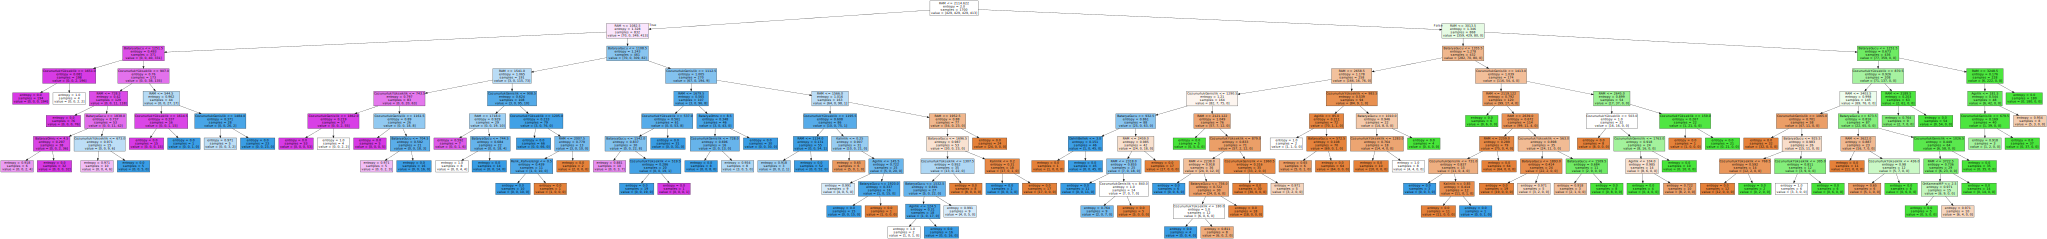

In [110]:
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
graph = Source(tree.export_graphviz(cart, out_file = None, feature_names = X.columns, filled = True))
display(SVG(graph.pipe(format = 'svg')))

Modelin karar ağacını oluştururken root node için "RAM"e dayanarak karar verdiğini görüyoruz. Özniteliklerin karar ağacına göre önem sıralamasına bakalım.

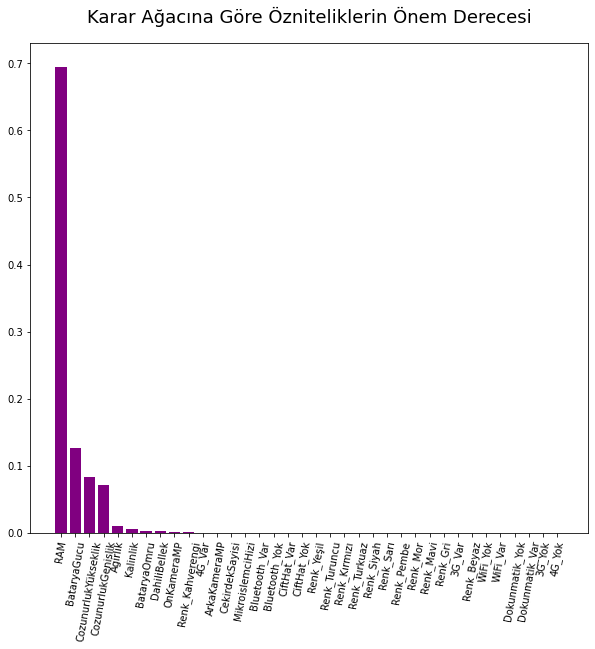

In [111]:
ranking = cart.feature_importances_
features = np.argsort(ranking)[::-1][:36]
columns = X.columns

plt.figure(figsize = (10, 9))
plt.title("Karar Ağacına Göre Özniteliklerin Önem Derecesi", y = 1.03, size = 18)
plt.bar(range(len(features)), ranking[features], color="purple", align="center")
plt.xticks(range(len(features)), columns[features], rotation = 80)
plt.show()

# K En Yakın Komşu Algoritması

Veri çerçevemizi bağımlı ve bağımsız olarak bölütleyip, eğitim ve test olarak da parçalamıştık. Şimdi aynı eğitim verileri üzerinden KNN modeli kuralım ve eğitelim.
K En Yakın Komşu Algoritması,sınıflandırılmak istenen yeni bireyin daha önceki bireylerden k tanesine yakınlığına bakılmasıdır.

In [112]:
knn = KNeighborsClassifier() #KNeighborsClassifier sınıfından knn nesnesi oluşturuyoruz.
knn_model = knn.fit(X_train, y_train) #Modeli fit ediyoruz

Eğitilen modelimizin tüm gözlemler için tahminde bulunmasını isteyelim.

In [113]:
y_pred = knn_model.predict(X)

Tüm gözlemler için bulunduğu tahminlere göre doğruluk skorunu görüntüleyelim.

In [114]:
accuracy_score(y, y_pred)

0.944

Karmaşıklık matrisini görüntüleyelim.

In [115]:
karmasiklik_matrisi = confusion_matrix(y, y_pred)
print(karmasiklik_matrisi)

[[457  20  23   0]
 [ 24 472   4   0]
 [ 12   2 472  14]
 [  0   0  13 487]]


Modeli farklı gözlemlerle kombinleyerek tekrardan skorunu hesaplayalım.

In [116]:
cross_val_score(cart_model, X, y, cv = 10)

array([0.815, 0.845, 0.83 , 0.86 , 0.855, 0.835, 0.84 , 0.85 , 0.86 ,
       0.83 ])

10 skorun ortalamasına bakalım.

In [117]:
cross_val_score(cart_model, X, y, cv = 10).mean()

0.842

Hedef özniteliğin değerlerine göre sınıflandırma raporunu görüntüleyelim.

In [118]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

      Normal       0.93      0.91      0.92       500
      Pahalı       0.96      0.94      0.95       500
        Ucuz       0.92      0.94      0.93       500
    Çok Ucuz       0.97      0.97      0.97       500

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



KNN modelini parametre optimizasyonu yaparak kuralım ve eğitelim.

En yakın komşu sayısını 2 ile 50 arasında hepsini deneyecek.

In [119]:
knn_params = {"n_neighbors": np.arange(2,50)}

In [120]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv = 3)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [121]:
print("En iyi skor: " + str(knn_cv.best_score_))
print("En iyi parametreler: " + str(knn_cv.best_params_))

En iyi skor: 0.9247044453169305
En iyi parametreler: {'n_neighbors': 13}


In [122]:
knn = KNeighborsClassifier(13)
knn_tuned = knn.fit(X_train, y_train)

In [123]:
y_pred = knn_tuned.predict(X_test)

In [124]:
accuracy_score(y_test, y_pred)

0.92

Modelin k değerini nasıl seçtiğini görüntülemek için, 50 adet k değeri için doğruluk skorlarını görselleştirelim.

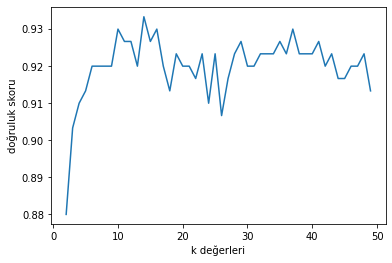

In [125]:
score_list = []

for each in range(2,50): # 2 den 50'ye kadar olan komşu sayılarını görmek istiyoruz.
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(X_train,y_train)
    score_list.append(knn2.score(X_test, y_test))
plt.plot(range(2,50),score_list)
plt.xlabel("k değerleri")
plt.ylabel("doğruluk skoru")
plt.show()
